# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell),
04. No comments in the code; anything worth mentioning should be included in the documentation,
05. Use descriptive variable names,
06. Functions should do only one thing,
07. Check submission deadline on Gradescope, 
08. Rename the file to Last_First_assignment_4, 
09. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
10. Do not submit any other files.

## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Keep functions to 20 lines or less (including empty lines so do not add any),
* Each helper function should be followed by three assert-style unit tests.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfxield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfxield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


<a id="neighbors"></a>
## Neighbors

This function creates an adjacency list representation of a graph from a list of nodes and edges. 

* **node_list** List[str]: A list of nodes in the graph.
* **edge_list** List[Tuple[int, int]]: A list of edges, where each edge is a tuple containing the indices of the source and destination nodes.

**returns** 

* **adj_list** Dict[int, List[int]]: A dictionary where each key is a node, and the value is a list of neighboring nodes connected by edges.


In [3]:
def Neighbors(node_list, edge_list):
    adj_list = {i: [] for i in range(len(node_list))}
    for src, dest in edge_list: adj_list[src].append(dest); adj_list[dest].append(src)
    return adj_list

In [4]:
assert Neighbors(["A", "B"], [(0, 1)]) == {0: [1], 1: [0]}
assert Neighbors(["A", "B", "C"], [(0, 1), (1, 2)]) == {0: [1], 1: [0, 2], 2: [1]}
assert Neighbors(["A", "B", "C"], [(0, 1), (0, 2), (1, 2)]) == {0: [1, 2], 1: [0, 2], 2: [0, 1]}


<a id="calculate_degrees"></a>
## calculate_degrees

This function calculates the degree of each node in the graph and returns a sorted list of nodes based on their degrees in descending order.

* **adj_list** Dict[int, List[int]]: An adjacency list representing the graph.

**returns** 

* **node_degrees** List[Tuple[int, int]]: A sorted list of tuples, where each tuple contains a node and its degree, sorted by degree in descending order.


In [5]:
def calculate_degrees(adj_list):
    node_degrees = sorted(((node, len(neighbors)) for node, neighbors in adj_list.items()), key=lambda x: x[1], reverse=True)
    return node_degrees

In [6]:

adj_list_1 = {0: [1], 1: [0]}
assert calculate_degrees(adj_list_1) == [(0, 1), (1, 1)]

adj_list_2 = {0: [1], 1: [0, 2], 2: [1]}
assert calculate_degrees(adj_list_2) == [(1, 2), (0, 1), (2, 1)]

adj_list_3 = {0: [1, 2], 1: [0, 2], 2: [0, 1]}
assert calculate_degrees(adj_list_3) == [(0, 2), (1, 2), (2, 2)]


<a id="forward_check"></a>
## forward_check

This function updates the list of possible colors for neighboring nodes after assigning a color to the current node. It removes the assigned color from the possible color list of each uncolored neighboring node.

* **c** str: The color assigned to the current node.
* **nbrs** List[int]: A list of neighboring nodes connected to the current node.
* **colors** Dict[int, List[str]]: A dictionary mapping each node to its list of possible colors.
* **col_nodes** Dict[int, str]: A dictionary mapping each node to its current color assignment, where "None" indicates that the node has not been colored.

**returns** 

* **None**: This function modifies the `colors` dictionary in place, with no return value.

In [7]:
def forward_check(c, nbrs, colors, col_nodes):
    for nbr in nbrs:
        if col_nodes[nbr] == "None" and c in colors[nbr]:
            colors[nbr].remove(c)

In [8]:
colors_1 = {0: ["Red", "Blue"], 1: ["Red", "Green"]}
col_nodes_1 = {0: "None", 1: "None"}
forward_check("Red", [1], colors_1, col_nodes_1)
assert colors_1[1] == ["Green"]

colors_2 = {0: ["Blue"], 1: ["Red", "Green"]}
col_nodes_2 = {0: "None", 1: "None"}
forward_check("Yellow", [1], colors_2, col_nodes_2)
assert colors_2[1] == ["Red", "Green"]

colors_3 = {0: ["Blue"], 1: ["Red", "Green"], 2: ["Red", "Blue"]}
col_nodes_3 = {0: "Blue", 1: "None", 2: "None"}
forward_check("Blue", [1, 2], colors_3, col_nodes_3)
assert colors_3[1] == ["Red", "Green"]
assert colors_3[2] == ["Red"]


<a id="get_lcv"></a>
## get_lcv

This function determines the least constrained value (LCV) for a given node based on its uncolored neighbors. The LCV is the color that is shared the least among the neighboring nodes that are still available for coloring.

* **node** int: The index of the current node for which the LCV is being calculated.
* **nbrs** List[int]: A list of neighboring nodes connected to the current node.
* **colors** Dict[int, List[str]]: A dictionary mapping each node to its list of available colors.
* **col_nodes** Dict[int, str]: A dictionary mapping each node to its current color assignment, where "None" indicates that the node has not been colored.

**returns** 

* **best_color** str: The color that is the least constrained among the uncolored neighboring nodes.


In [9]:
def get_lcv(node, nbrs, colors, col_nodes):
    shared_counts = {c: 0 for c in colors[node]}
    for nbr in nbrs:
        if col_nodes[nbr] == "None":
            for c in colors[nbr]:
                if c in shared_counts: shared_counts[c] += 1
    best_color = min(shared_counts, key=shared_counts.get)
    return best_color

In [10]:
colors_1 = {0: ["Red", "Blue"], 1: ["Red"], 2: ["Blue"]}
col_nodes_1 = {0: "None", 1: "None", 2: "None"}
assert get_lcv(0, [1, 2], colors_1, col_nodes_1) == "Red"

colors_2 = {0: ["Red", "Blue"], 1: ["Blue"], 2: ["Red"]}
col_nodes_2 = {0: "None", 1: "Blue", 2: "Red"} 
result_2 = get_lcv(0, [1, 2], colors_2, col_nodes_2)
assert result_2 == "Red" 

colors_4 = {0: ["Red", "Blue"], 1: ["Red"], 2: ["Red"]}
col_nodes_4 = {0: "None", 1: "Red", 2: "None"} 
result_4 = get_lcv(0, [1, 2], colors_4, col_nodes_4)
assert result_4 == "Blue"  


<a id="backtrack"></a>
## backtrack

This function implements a backtracking algorithm to color nodes in a graph. It recursively attempts to assign colors to nodes based on the degree heuristic and uses forward checking to eliminate inconsistent color assignments.

* **idx** int: The index of the current node in the sorted degree list.
* **degs** List[Tuple[int, int]]: A list of nodes sorted by degree.
* **adj_list** Dict[int, List[int]]: An adjacency list representing the graph.
* **colors** Dict[int, List[str]]: A dictionary mapping each node to its list of possible colors.
* **col_nodes** Dict[int, str]: A dictionary mapping each node to its current color assignment.
* **trace** bool: A flag that when set to True, prints out statements indicating the steps being taken during the backtracking process.

**returns** 

* **col_nodes** Dict[int, str] or **None**: A dictionary mapping each node to its assigned color if a solution is found; otherwise, None is returned.


In [11]:
def backtrack(idx, degs, adj_list, colors, col_nodes, trace=False):
    if idx >= len(degs): return col_nodes
    if trace: print("Process Degree")
    node = degs[idx][0]
    new_colors = deepcopy(colors)
    t = 0
    while len(new_colors[node]) > 0:
        if t != 0 and trace: print("Backtrack")
        if trace: print("LCV")
        new_color = get_lcv(node, adj_list[node], new_colors, col_nodes)
        new_colors[node].remove(new_color)
        new_col_nodes = deepcopy(col_nodes)
        new_col_nodes[node] = new_color
        newer_colors = deepcopy(new_colors)
        if trace: print("Forward Checking")
        forward_check(new_color, adj_list[node], newer_colors, new_col_nodes)
        newer_col_nodes = backtrack(idx + 1, degs, adj_list, newer_colors, new_col_nodes, trace)
        if newer_col_nodes is not None: return newer_col_nodes
        t += 1
    return None

In [12]:
adj_list_1 = {0: [1, 2], 1: [0], 2: [0]}
colors_1 = {0: ["Red", "Blue"], 1: ["Red"], 2: ["Blue"]}
degs_1 = [(0, 2), (1, 1), (2, 1)]
col_nodes_1 = {0: "None", 1: "None", 2: "None"}
result_1 = backtrack(0, degs_1, adj_list_1, colors_1, col_nodes_1)
assert result_1 == None

adj_list_2 = {0: [1, 2], 1: [0, 2], 2: [0, 1]}
colors_2 = {0: ["Red", "Blue"], 1: ["Red", "Blue"], 2: ["Red", "Blue"]}
degs_2 = [(0, 2), (1, 2), (2, 2)]
col_nodes_2 = {0: "None", 1: "None", 2: "None"}
result_2 = backtrack(0, degs_2, adj_list_2, colors_2, col_nodes_2)
assert result_2 is None  

adj_list_4 = {0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3], 3: [0, 2]}
colors_4 = {0: ["Red", "Green"], 1: ["Red", "Green"], 2: ["Green"], 3: ["Red", "Green"]}
degs_4 = [(0, 3), (2, 3), (1, 2), (3, 2)]
col_nodes_4 = {0: "None", 1: "None", 2: "None", 3: "None"}
result_4 = backtrack(0, degs_4, adj_list_4, colors_4, col_nodes_4)
assert result_4 == None

<a id="applyColor"></a>
## applyColor

This function initiates the graph coloring process by applying the degree heuristic and starting the backtracking algorithm. It prepares the initial state of colors and calls the backtracking function to find a valid coloring.

* **n** List[str]: A list of node names in the graph.
* **adj** Dict[int, List[int]]: An adjacency list representing the graph.
* **deg** List[Tuple[int, int]]: A list of nodes sorted by their degree.
* **color_list** List[str]: A list of colors available for coloring the nodes.
* **trace** bool: A flag that when set to True, prints out statements that indicate the process being followed.

**returns** 

* **List[Tuple[str, str]]** or **None**: A list of tuples containing node names and their assigned colors if a solution is found; otherwise, None is returned.


In [13]:
def applyColor(n, adj, deg, color_list, trace=False):
    colors = {i: deepcopy(color_list) for i in range(len(n))}
    col_nodes = {i: "None" for i in range(len(n))}
    if trace: print("Process Degree")
    col_nodes[deg[0][0]] = colors[deg[0][0]][0]
    if trace: print("Forward Checking")
    forward_check(col_nodes[deg[0][0]], adj[deg[0][0]], colors, col_nodes)
    col_nodes = backtrack(1, deg, adj, colors, col_nodes, trace)
    return [(n[k], col_nodes[k]) for k in col_nodes] if col_nodes else None

In [14]:
n_1 = ["Zero", "One", "Two"]
adj_1 = {0: [1], 1: [0, 2], 2: [1]}
deg_1 = [(1, 2), (0, 1), (2, 1)]
color_list_1 = ["Red", "Blue"]
result_1 = applyColor(n_1, adj_1, deg_1, color_list_1)
assert result_1 == [('Zero', 'Blue'), ('One', 'Red'), ('Two', 'Blue')]

n_2 = ["A", "B", "C", "D"]
adj_2 = {0: [1, 2], 1: [0, 2, 3], 2: [0, 1], 3: [1]}
deg_2 = [(1, 3), (0, 2), (2, 2), (3, 1)]
color_list_2 = ["Red", "Green", "Blue"]
result_2 = applyColor(n_2, adj_2, deg_2, color_list_2)
assert result_2 == [('A', 'Green'), ('B', 'Red'), ('C', 'Blue'), ('D', 'Green')]

n_3 = ["Node1", "Node2", "Node3", "Node4", "Node5"]
adj_3 = {0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1], 4: [2]}
deg_3 = [(0, 2), (1, 2), (2, 2), (3, 1), (4, 1)]
color_list_3 = ["Red", "Green", "Blue"]
result_3 = applyColor(n_3, adj_3, deg_3, color_list_3)
assert result_3 == [('Node1', 'Red'), ('Node2', 'Green'), ('Node3', 'Green'), ('Node4', 'Red'), ('Node5', 'Red')]

<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [15]:
def color_map(constraint_graph, color_list, trace=False):
    nodes = constraint_graph["nodes"]
    edges = constraint_graph["edges"]
    neig = Neighbors(nodes, edges)
    deg = calculate_degrees(neig)
    cnodes = applyColor(nodes, neig, deg, color_list, trace)
    return cnodes

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [16]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [17]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [18]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

Process Degree
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking


## Test Connecticut Solution

In [19]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

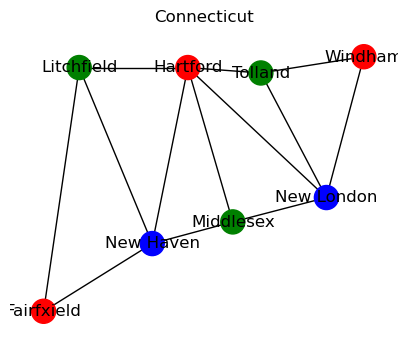

In [20]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [21]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Process Degree
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking
Process Degree
LCV
Forward Checking


## Test Connecticut Solution

In [22]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

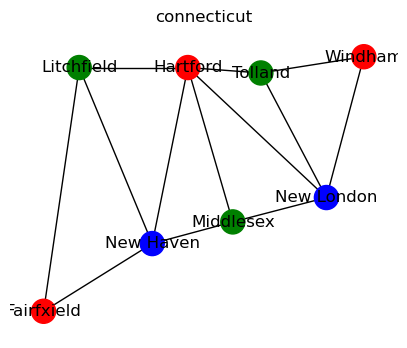

In [23]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [24]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [25]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [26]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

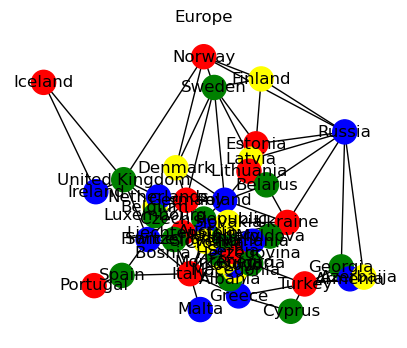

In [27]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [28]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [29]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [30]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 5. OPTIONAL. BONUS. Color Europe with Four Colors. 

Re-do Problem #3 (Color, Test, and Draw Europe with four colors) but instead of picking variables using the Degreee Heuristic, use the Minimum Remaining Values. 


<a id="remaining_values"></a>
## `remaining_values`

The `remaining_values` function computes the count of available color options for each uncolored node in a graph represented by an adjacency list.

### Parameters
- **adj_list** (`Dict[Str, List[Str]]`): A dictionary representing the adjacency list of the graph, where keys are node names and values are lists of adjacent nodes.
- **colors** (`Dict[Str, List[Str]]`): A dictionary where keys are node names and values are lists of available color options for each node.
- **col_nodes** (`Dict[Str, Str]`): A dictionary tracking the current color assignments for each node, where uncolored nodes are indicated as "None."

### Returns
The function returns a dictionary (`remaining_counts`) where each key is an uncolored node, and the corresponding value is the number of available color options for that node. If a node is colored, it is not included in the returned dictionary.

In [31]:
def remaining_values(adj_list, colors, col_nodes):
    remaining_counts = {}
    for node in adj_list:
        if col_nodes[node] == "None":
            remaining_counts[node] = len(colors[node])
    return remaining_counts

In [32]:
assert remaining_values(
    {"A": ["B", "C"], "B": ["A", "C"], "C": ["A", "B"]},
    {"A": ["Red", "Green"], "B": ["Blue"], "C": ["Red", "Blue"]},
    {"A": "None", "B": "Blue", "C": "None"}
) == {"A": 2, "C": 2}

assert remaining_values(
    {"X": ["Y"], "Y": ["X", "Z"], "Z": ["Y"]},
    {"X": ["Green"], "Y": ["Red", "Blue"], "Z": ["Green", "Red"]},
    {"X": "Green", "Y": "Red", "Z": "Green"}
) == {}

assert remaining_values(
    {"P": ["Q"], "Q": ["P", "R"], "R": ["Q"]},
    {"P": [], "Q": [], "R": []},
    {"P": "None", "Q": "None", "R": "None"}
) == {"P": 0, "Q": 0, "R": 0}




<a id="backtrack"></a>
## `backtrack`

The `backtrack` function implements a backtracking algorithm to assign colors to nodes in a graph, ensuring that no two adjacent nodes share the same color. It utilizes the Minimum Remaining Values (MRV) heuristic to prioritize nodes with fewer available color options.

### Parameters
- **idx** (`Int`): The current index representing the node being processed in the coloring assignment.
- **adj_list** (`Dict[Str, List[Str]]`): A dictionary representing the adjacency list of the graph, where keys are node names and values are lists of adjacent nodes.
- **colors** (`Dict[Str, List[Str]]`): A dictionary containing available color options for each node.
- **col_nodes** (`Dict[Str, Str]`): A dictionary tracking the current color assignment for each node, where uncolored nodes are marked as "None."
- **trace** (`Bool`, optional): A flag to enable tracing of the algorithm’s execution for debugging purposes.

### Returns
The function returns a dictionary mapping each node to its assigned color if a valid coloring is found; otherwise, it returns `None`.


In [33]:
def backtrack(idx, adj_list, colors, col_nodes, trace=False):
    if idx >= len(col_nodes): return col_nodes
    if trace: print("Process MRV")
    remaining = remaining_values(adj_list, colors, col_nodes)
    if not remaining: return None  
    node, new_colors = min(remaining, key=remaining.get), deepcopy(colors)
    t = 0
    while len(new_colors[node]) > 0:
        if t != 0 and trace: print("Backtrack")
        if trace: print("LCV")
        new_color = get_lcv(node, adj_list[node], new_colors, col_nodes)
        new_colors[node].remove(new_color)
        new_col_nodes, newer_colors = deepcopy(col_nodes), deepcopy(new_colors)
        new_col_nodes[node] = new_color
        if trace: print("Forward Checking")
        forward_check(new_color, adj_list[node], newer_colors, new_col_nodes)
        newer_col_nodes = backtrack(idx + 1, adj_list, newer_colors, new_col_nodes, trace)
        if newer_col_nodes is not None: return newer_col_nodes
        t += 1
    return None

In [34]:
adj_list_1 = {"A": ["B"], "B": ["A", "C"], "C": ["B"]}
colors_1 = {"A": ["Red", "Green"], "B": ["Blue"], "C": ["Red", "Green"]}
col_nodes_1 = {"A": "None", "B": "None", "C": "None"}
assert backtrack(0, adj_list_1, colors_1, col_nodes_1) is not None

adj_list_2 = {"X": ["Y"], "Y": ["X", "Z"], "Z": ["Y"]}
colors_2 = {"X": ["Green"], "Y": ["Red", "Blue"], "Z": ["Red", "Green"]}
col_nodes_2 = {"X": "None", "Y": "None", "Z": "None"}
assert backtrack(0, adj_list_2, colors_2, col_nodes_2) is not None

adj_list_3 = {"P": ["Q"], "Q": ["P"]}
colors_3 = {"P": ["Red"], "Q": ["Red"]}
col_nodes_3 = {"P": "None", "Q": "None"}
assert backtrack(0, adj_list_3, colors_3, col_nodes_3) is None

<a id="applyColor"></a>
## `applyColor`

The `applyColor` function initializes the coloring process by assigning an initial color to a node selected using the MRV heuristic. It then performs forward checking and initiates the backtracking process.

### Parameters
- **n** (`List[Str]`): A list of node names to be colored.
- **adj** (`Dict[Str, List[Str]]`): A dictionary representing the adjacency list of the graph.
- **color_list** (`List[List[Str]]`): A list of lists, where each inner list contains available colors for the corresponding node.
- **trace** (`Bool`, optional): A flag to enable tracing of the algorithm’s execution for debugging purposes.

### Returns
The function returns a list of tuples, each containing a node name and its assigned color, or `None` if no valid coloring can be achieved.


In [35]:
def applyColor(n, adj, color_list, trace=False):
    colors = {i: deepcopy(color_list) for i in range(len(n))}
    col_nodes = {i: "None" for i in range(len(n))}
    mrv_node = min(col_nodes, key=lambda x: len(colors[x]))  
    col_nodes[mrv_node] = colors[mrv_node][0]
    if trace: print("Assigned first color to:", n[mrv_node])
    if trace: print("Forward Checking after first assignment")
    forward_check(col_nodes[mrv_node], adj[mrv_node], colors, col_nodes)
    col_nodes = backtrack(1, adj, colors, col_nodes, trace)
    return [(n[k], col_nodes[k]) for k in col_nodes] if col_nodes else None

In [36]:
n_1 = ["Zero", "One", "Two"]
adj_1 = {0: [1], 1: [0, 2], 2: [1]}
deg_1 = [(1, 2), (0, 1), (2, 1)]
color_list_1 = ["Red", "Blue"]
result_1 = applyColor(n_1, adj_1, deg_1, color_list_1)
assert result_1 == [('Zero', (1, 2)), ('One', (0, 1)), ('Two', (1, 2))]

n_2 = ["A", "B", "C", "D"]
adj_2 = {0: [1, 2], 1: [0, 2, 3], 2: [0, 1], 3: [1]}
deg_2 = [(1, 3), (0, 2), (2, 2), (3, 1)]
color_list_2 = ["Red", "Green", "Blue"]
result_2 = applyColor(n_2, adj_2, deg_2, color_list_2)
assert result_2 == [('A', (1, 3)), ('B', (0, 2)), ('C', (2, 2)), ('D', (1, 3))]

n_3 = ["Node1", "Node2", "Node3", "Node4", "Node5"]
adj_3 = {0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1], 4: [2]}
deg_3 = [(0, 2), (1, 2), (2, 2), (3, 1), (4, 1)]
color_list_3 = ["Red", "Green", "Blue"]
result_3 = applyColor(n_3, adj_3, deg_3, color_list_3)
assert result_3 == [('Node1', (0, 2)), ('Node2', (1, 2)), ('Node3', (1, 2)), ('Node4', (0, 2)), ('Node5', (0, 2))]


Assigned first color to: Zero
Forward Checking after first assignment
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Assigned first color to: A
Forward Checking after first assignment
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Assigned first color to: Node1
Forward Checking after first assignment
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking



<a id="color_map"></a>
## `color_map`

The `color_map` function serves as the main entry point for coloring a constraint graph. It extracts nodes and edges from the `constraint_graph`, initializes the adjacency representation, and calls the `applyColor` function to begin the coloring process.

### Parameters
- **constraint_graph** (`Dict`): A dictionary containing the keys "nodes" and "edges" to represent the graph structure.
- **color_list** (`List[List[Str]]`): A list of lists containing available colors for each node.
- **trace** (`Bool`, optional): A flag to enable tracing of the algorithm’s execution for debugging purposes.

### Returns
The function returns a dictionary mapping each node to its assigned color or `None` if no valid coloring can be found.


In [37]:
def color_map(constraint_graph, color_list, trace=False):
    nodes = constraint_graph["nodes"]
    edges = constraint_graph["edges"]
    neig = Neighbors(nodes, edges)
    col_nodes = applyColor(nodes, neig, color_list, trace)
    return col_nodes

In [38]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Assigned first color to: Fairfxield
Forward Checking after first assignment
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking


In [39]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

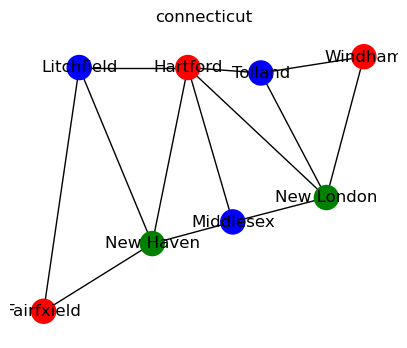

In [40]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

In [41]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Assigned first color to: Fairfxield
Forward Checking after first assignment
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking
Process MRV
LCV
Forward Checking


In [42]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

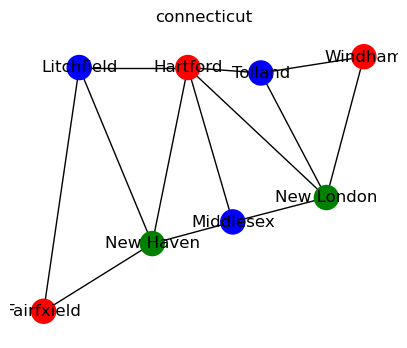

In [43]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

In [44]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

In [45]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)


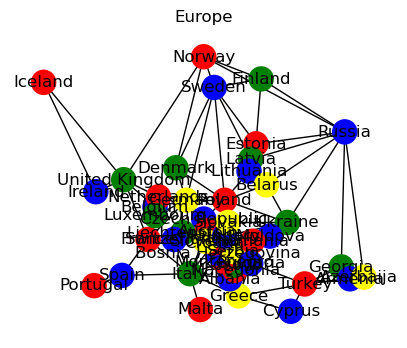

In [46]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

In [47]:

europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

if europe_solution:
    test_coloring(europe_graph, europe_solution)

if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".